In [20]:
import requests
import json
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt

In [7]:
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

In [8]:
print(data)

{'id': 1371, 'url': 'https://www.tvmaze.com/shows/1371/westworld', 'name': 'Westworld', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Science-Fiction', 'Western'], 'status': 'Ended', 'runtime': 60, 'averageRuntime': 63, 'premiered': '2016-10-02', 'ended': '2022-08-14', 'officialSite': 'http://www.hbo.com/westworld', 'schedule': {'time': '21:00', 'days': ['Sunday']}, 'rating': {'average': 8.2}, 'weight': 99, 'network': {'id': 8, 'name': 'HBO', 'country': {'name': 'United States', 'code': 'US', 'timezone': 'America/New_York'}, 'officialSite': 'https://www.hbo.com/'}, 'webChannel': None, 'dvdCountry': None, 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'}, 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution

In [9]:
# Extract the required data
episode_data = data["_embedded"]["episodes"]
print(episode_data)

[{'id': 869671, 'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original', 'name': 'The Original', 'season': 1, 'number': 1, 'type': 'regular', 'airdate': '2016-10-02', 'airtime': '21:00', 'airstamp': '2016-10-03T01:00:00+00:00', 'runtime': 68, 'rating': {'average': 8}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}, 'summary': "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>", '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/869671'}, 'show': {'href': 'https://api.tvmaze.com/shows/1371'}}}, {'id': 911201, 'url': 'https://www.tvmaze.com/episodes/9

In [34]:
# data with proper formatting
episodes = []
for episode in episode_data:
    attributes = {
        "id": episode.get("id"),
        "url": episode.get("url"),
        "name": episode.get("name"),
        "season": episode.get("season"),
        "number": episode.get("number"),
        "type": episode.get("type"),
        "airdate": datetime.datetime.strptime(episode.get("airdate"), "%Y-%m-%d").date(),
        "airtime": datetime.datetime.strptime(episode.get("airtime"), "%H:%M").strftime("%I:%M %p"),
        "runtime": episode.get("runtime"),
        "average_rating": episode.get("rating", {}).get("average"),
        "summary": BeautifulSoup(episode.get("summary", ""), "html.parser").get_text(),
        "medium_image_link": episode.get("image", {}).get("medium"),
        "original_image_link": episode.get("image", {}).get("original")
    }
    episodes.append(attributes)
print(episodes)

[{'id': 869671, 'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original', 'name': 'The Original', 'season': 1, 'number': 1, 'type': 'regular', 'airdate': datetime.date(2016, 10, 2), 'airtime': '09:00 PM', 'runtime': 68, 'average_rating': 8, 'summary': "A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.", 'medium_image_link': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg', 'original_image_link': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}, {'id': 911201, 'url': 'https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut', 'name': 'Chestnut', 'season': 1, 'number': 2, 'type': 'regular', 'airdate': datetime.date(2016, 10, 9), 'airtime': '09:0

In [35]:
# Extract the desired data
extracted_data = episodes[0]

# Print the extracted data
for key, value in extracted_data.items():
    print(f"{key}: {value}")

id: 869671
url: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
name: The Original
season: 1
number: 1
type: regular
airdate: 2016-10-02
airtime: 09:00 PM
runtime: 68
average_rating: 8
summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
medium_image_link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
original_image_link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg


overall ratings for each season:
1: [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7]
2: [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5]
3: [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7]
4: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]


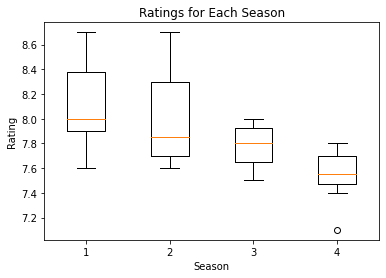

In [56]:
# 1. Get all the overall ratings for each season and compare the ratings using plots
season_ratings = {}
for episode in episodes:
    season = episode["season"]
    rating = episode["average_rating"]
    if season not in season_ratings:
        season_ratings[season] = []
    season_ratings[season].append(rating)
print("overall ratings for each season:")
for key, value in season_ratings.items():
    print(f"{key}: {value}")    
    
seasons = sorted(season_ratings.keys())
ratings = [season_ratings[season] for season in seasons]

plt.boxplot(ratings, labels=seasons)
plt.xlabel("Season")
plt.ylabel("Rating")
plt.title("Ratings for Each Season")
plt.show()

In [51]:
# Get all the episode names, whose average rating is more than 8 for every season
highly_rated_episodes = []
for episode in episodes:
    if episode["average_rating"] > 8:
        highly_rated_episodes.append(episode["name"])
print("All the episode names, whose average rating is more than 8 for every seasonhighly_rated_episodes:")
for episode in highly_rated_episodes:
    print(episode)

All the episode names, whose average rating is more than 8 for every seasonhighly_rated_episodes:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind
Kiksuya
Vanishing Point
The Passenger


In [49]:
# 3. Get all the episode names that aired before May 2019
early_episodes = []
for episode in episodes:
    if episode["airdate"] is not None and episode["airdate"] < datetime.date(2019, 5, 1):
        early_episodes.append(episode["name"])
print("All the episode names that aired before May 2019:")
for episode in early_episodes:
    print(episode)

All the episode names that aired before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [45]:
# 4. Get the episode name from each season with the highest and lowest rating
season_highest_ratings = {}
season_lowest_ratings = {}
for episode in episodes:
    season = episode["season"]
    rating = episode["average_rating"]
    if season not in season_highest_ratings:
        season_highest_ratings[season] = {"episode": episode["name"], "rating": rating}
        season_lowest_ratings[season] = {"episode": episode["name"], "rating": rating}
    else:
        if rating > season_highest_ratings[season]["rating"]:
            season_highest_ratings[season] = {"episode": episode["name"], "rating": rating}
        if rating < season_lowest_ratings[season]["rating"]:
            season_lowest_ratings[season] = {"episode": episode["name"], "rating": rating}
            
print("Episode name from each season with the highest rating:")
for key, value in season_highest_ratings.items():
    print(f"{key}: {value}")
print("Episode name from each season with the lowest rating:")
for key, value in season_lowest_ratings.items():
    print(f"{key}: {value}")

Episode name from each season with the highest rating:
1: {'episode': 'The Bicameral Mind', 'rating': 8.7}
2: {'episode': 'Kiksuya', 'rating': 8.7}
3: {'episode': 'Parce Domine', 'rating': 8}
4: {'episode': 'Zhuangzi', 'rating': 7.8}
Episode name from each season with the lowest rating:
1: {'episode': 'The Stray', 'rating': 7.6}
2: {'episode': 'Akane No Mai', 'rating': 7.6}
3: {'episode': 'Decoherence', 'rating': 7.5}
4: {'episode': 'The Auguries', 'rating': 7.1}


In [44]:
# 5. Get the summary for the most popular (highest rated) episode in every season
popular_episodes_summary = {}
for episode in episodes:
    season = episode["season"]
    rating = episode["average_rating"]
    if season not in popular_episodes_summary:
        popular_episodes_summary[season] = {"episode": episode["name"], "rating": rating, "summary": episode["summary"]}
    else:
        if rating > popular_episodes_summary[season]["rating"]:
            popular_episodes_summary[season] = {"episode": episode["name"], "rating": rating, "summary": episode["summary"]}

print("Summary for the most popular (highest rated) episode in every season:")
for key, value in popular_episodes_summary.items():
    print(f"{key}: {value}")

Summary for the most popular (highest rated) episode in every season:
1: {'episode': 'The Bicameral Mind', 'rating': 8.7, 'summary': "Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative."}
2: {'episode': 'Kiksuya', 'rating': 8.7, 'summary': "Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering."}
3: {'episode': 'Parce Domine', 'rating': 8, 'summary': "If you're stuck in a loop, try walking in a straight line."}
4: {'episode': 'Zhuangzi', 'rating': 7.8, 'summary': 'God is bored.'}
